<a href="https://colab.research.google.com/github/karabash/.NEtFinalExam/blob/master/Hand_in_Laboration3_part1_vt21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboration 3 part 1 Regression

In this part of laboratory 3 you will perform some different types of regression analysis on a dataset with weather data. Feel free to watch the lecture videos for lecture 6 that goes through regression (part 2 and 4 are most important). 

In the laboratory, only questions that have a **Q** in front should be answered *italicized text* (You may have to do some coding to be able to answer the question in some cases while in others there is only theoretical questions.). 


Tasks that are not questions but only coding are marked with **C**, these are also mandatory.

Example:

**Q** How many men and women have answered the survey? (Here it is preferable to do some coding to easily find the answer.)

**C** Encode a function that calculates the 20 most common words in your data set.

*When we correct the laboration we will not look specifically on how you did your coding to answer questions, but look at whether the answer is correct or not when it comes to questions marked with **Q** .*

**This part of the laboration will be corrected by Soraya (and Elin) and therefore you need to write your answers in English!**

**You are expected to add code blocks or text (markdown) blocks when needed. Make sure to use enough cells to make you code easy to read i.e. try to only make one thing in each cell.**

An initial import of a few of the required libraries is already coded, below. When you need other libraries you can add them in this cell or in the cell where you need them further in the lab. 

In [2]:
# Import Pandas Library, used for data manipulation
# Import matplotlib, used to plot our data
# Import nump for mathemtical operations
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns




In [3]:
from google.colab import drive
try:
    from google.colab import drive
    drive.mount("/content/drive/", force_remount=True)
    google_drive_prefix = "/content/drive/My Drive"
    data_prefix = "{}/mnist/".format(google_drive_prefix)
except ModuleNotFoundError: 
    data_prefix = "data/"
drive.mount('/content/drive')

Mounted at /content/drive/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
os.chdir('/content/drive/MyDrive/lab3')
!pwd

/content/drive/MyDrive/lab3


## Data

Start by: 
**C Importing our dataset and store it in a suitable format with the name `weather_data`.**

In [29]:
# Import our WeatherData and store it in the variable weather_data 
weather_data = pd.read_csv('WeatherData_lab3.csv',delimiter=';')


# Display the data in the notebook
weather_data["RainToday"].replace({"No": 0, "Yes": 1}, inplace=True)
weather_data.head(7)


,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity,Sunshine,Cloud,RainToday,Visibility (km)
0,9.472222,14.1197,1015.13,0.89,NaN,8.0,0.0,15.8263
1,9.355556,14.2646,1015.63,0.86,NaN,NaN,0.0,15.8263
2,9.377778,3.9284,1015.94,0.89,NaN,NaN,0.0,14.9569
3,8.288889,14.1036,1016.41,0.83,NaN,NaN,0.0,15.8263
4,8.755556,11.0446,1016.51,0.83,NaN,7.0,0.0,15.8263
5,9.222222,13.9587,1016.66,0.85,NaN,NaN,0.0,14.9569
6,7.733333,12.3648,1016.72,0.95,NaN,1.0,0.0,9.9820


**Q1 What type of data is in the dataset? (HINT! dtype and type of variable: categorial/continous)**
  

In [30]:
levels = len(pd.value_counts(weather_data['Humidity']))
print("There are {} categories in the Description column".format(levels))

There are 34 categories in the Description column


Continuous Data - Interval Data
Continuous Data represents measurements and therefore their values can’t be counted but they can be measured. Interval values represent ordered units that have the same difference.


**Q2 How many rows and columns, number of datapoints?**




total_rows: 50 and total_cols: 8 or weather_data.info() method gives also, how many rows abd columns contains the weather_data.

In [31]:
total_rows=len(weather_data.axes[0])
total_cols=len(weather_data.axes[1])
display("total_rows: " + str(total_rows)+ " and total_cols: " +str(total_cols))

'total_rows: 50 and total_cols: 8'

**Q3 How do you interpret the different columns, write a short sentence that describes each column.**



1 Temperature (C)  ->  contains float data values and represents of temperaturese as  centigrade    50 non-null     float64

2   Wind Speed (km/h)     contains float data values  and represents of speed as km

3   Pressure (millibars)   contains float data values  and represents of millibars
 
4   Humidity         contains float data values  and represents of humidity

5   Sunshine  contains float data values type and represents of sunshine


6   Cloud         contains float data values type and represents of cloud 

7   RainToday      contains float data values type and represents of rain today ( true or false 1.0 - 0.0)

8   Visibility (km)   contains float data values type and represents of visibility (a.k.a distance)

**C1 Rename columns that have unsuitable names for the columns or if the columns have names that are difficult to interpret. (IF everything looks good, you don't need to do anything here)**

In [39]:
weather_data = weather_data.set_axis(['temp_as_centigrade', 'wind_speed_as_kmh', 'press_milibars', 'humidity', 'sunshine', 'cloud', 'rain', 'visibility_km'], axis=1, inplace=False)

weather_data
weather_data.head(3)

,temp_as_centigrade,wind_speed_as_kmh,press_milibars,humidity,sunshine,cloud,rain,visibility_km
0,9.472222,14.1197,1015.13,0.89,NaN,8.0,0.0,15.8263
1,9.355556,14.2646,1015.63,0.86,NaN,NaN,0.0,15.8263
2,9.377778,3.9284,1015.94,0.89,NaN,NaN,0.0,14.9569


**C2 Code suitable visualisations that show the relationship between the different variables in the dataset (in two dimensions). Include labels on x and y axis and display a legend for the visualisation(s). You can choose if you want to visualise each relationship in its own plot or if you want to plot all relationships in one visualisation, if you choose the latter, you need to make it possible to distinguish between the different variables.**

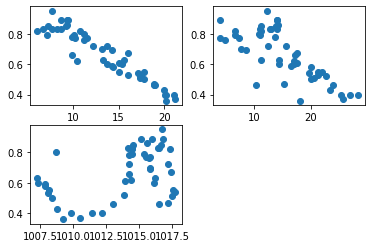

In [47]:
#               x1                      x2                      x3            
weather_df1 = ['temp_as_centigrade','wind_speed_as_kmh', 'press_milibars' ]
X_final = weather_data[weather_df1]
Y_final = weather_data.humidity
#y against x1, x2 or x3

plt.subplot(2,2,1)
#strong linear - humanity agains temp_as_centigrade
plt.scatter(X_final['temp_as_centigrade'],Y_final)
plt.subplot(2,2,2)

#linear - humanity agains wind_speed_as_kmh
plt.scatter(X_final['wind_speed_as_kmh'],Y_final)
plt.subplot(2,2,3)

#no relationship between humanity agains press_milibars
plt.scatter(X_final['press_milibars'],Y_final)



## Data cleaning and feature engineering

> Indented block



**Q** Are there any missing values? If yes, what is your interpretation of the reason(s) and what type of missing values? (HINT! MCAR;MAR;NMAR)

**C** Handle any missing values in a suitable way (if there are none, you don't need to do anything here). Make sure you changes are saved in you dataframe.

**Q** Are there any variables that need further cleaning/feature engineering such as changing dtype/calculations to improve categorial features etc? 

**Q** IS there a need fo standardization/normalization or scaling of variables? Why/why not? (Motivate for each of them)

**C** If yes on any of the above, fix this column and make sure to make the changes on your existing dataframe.



## Linear Regression

### Your first task in regards to modeling is to do a simple linear regression, using only two of the variables present in the dataset.

To help you further the codeblock below show a heatmap of the correlation between the different varaibles. Also, another codeblock show a pairplot that visualize the relationsship between pairwise variables, it is coded using the seaborn library.



In [ ]:
#seaborn heatmap
corrMatrix = weather_data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

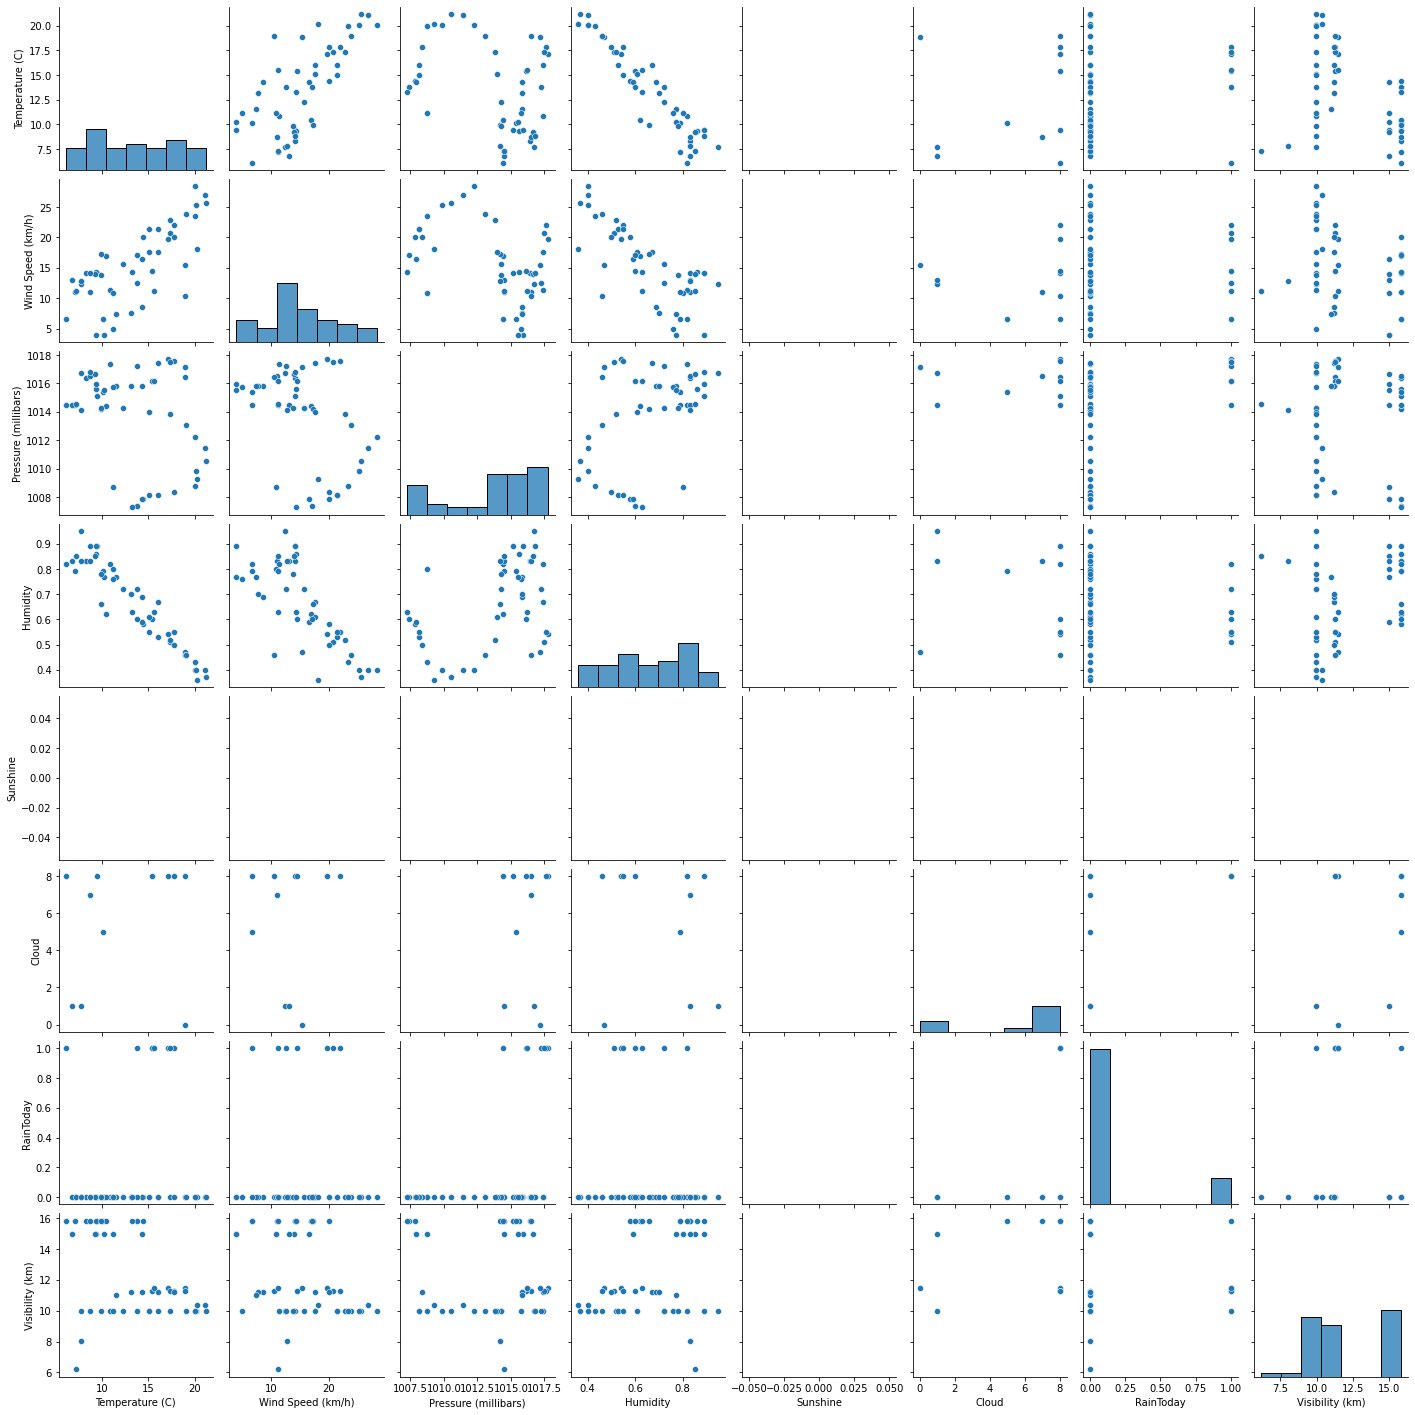

In [ ]:
#seaborn pairplot
sns.pairplot(weather_data)

**Q** Based on the heat map and your visualisations on relationships, which two variables (one for input (x) and another for output (y) would you consider most appropriate for doing a linear regression analysis? 

HINT! THe table below (from [this page](https://www.statology.org/what-is-a-strong-correlation/))helps you interpret the heatmap. **A must in a linear regression model is to have a linear relationship between the variables!**

r in the table below is the Pearson correlation coefficient that pandas calculate for us (Note that it it the absolut value of r, the correclation coefficent can be both negative and positive). Also see [pandas documentation on correlation calculations](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html).

| Absolute value of r    | Strength of relationship|        
|------------------------|-------------------------|
| r < 0.25               |No relationship          |
| 0.25 < r < 0.5         |Weak relationship        |
| 0.5 < r < 0.75         |Moderate relationship    |
| r > 0.75               |Strong relationship      |


**Q** Which column should represent the independent variable, x, and the dependent variable, y (the one you want to predict). In order to get the best possible prediction of y? 
Motivate your answer

**C** Investigate if there are any outliers in the two variables you have chosen, if so, handle them in a suitable way. 

**Q** Why did you choose to handle/not handle the outliers in the two variables?

### Modeling

**C** Assign the correct values to x and y in the codeblock provided below. (NOTE! You should call values().reshape() on x because scikit_learn requires input to be in the form of two dimensional arrays i.e. a numpy array (created by pandas.values() in 2D ()created by numpy.reshape()). Or to be more precise, to have one column and as many rows as necessary. That’s exactly what the argument (-1, 1) of .reshape() specifies. See also [numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) and [scikit_learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression)

The code already visible below imports the correct scikit_learn model (LinearRegression) in order to perform the training. Further, code is provided that performs the splitting of data into training and test and also performs the training on the trainingdataset and prediction on both the test and training datasets. 

**Q** What does the last three lines in the codeblock below do?

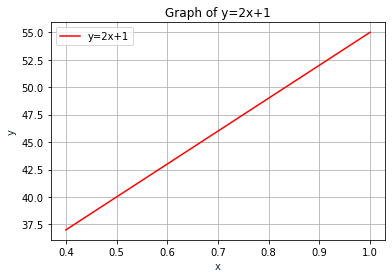

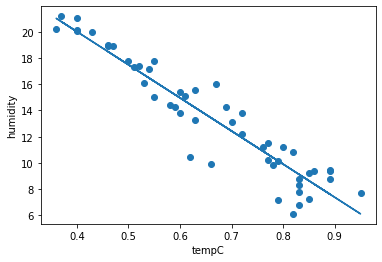

In [ ]:
 
import matplotlib.pyplot as plt
import numpy as np

y = -30*x+25  

plt.plot(x, y, '-r', label='y=2x+1')
plt.title('Graph of y=2x+1')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')


plt.grid()
plt.show()

def plotReg(x_values,y_values):
    x = np.linspace(0.4,1,35)
    x = x_values.to_numpy().reshape(-1, 1)
    y = y_values
    # Define the variable lr_model as our linear regression model
	
    lr_model = LinearRegression()
    # Fit our linear regression model to our data, we are essentially finding θ₀ and θ₁ in our regression line: ŷ = θ₀ + θ₁𝑥. Gradient descent and other methods are used for this.
   
    lr_model.fit(x, y)
    # Find predicted values for all x values by applying ŷᵢ = θ₀ + θ₁𝑥ᵢ
    y_pred = lr_model.predict(x)
    plt.scatter(x, y)
    plt.xlabel('tempC')
    plt.ylabel('humidity')
    # Here we are plotting our regression line ŷ = θ₀ + θ₁𝑥
    plt.plot(x, y_pred)

plotReg(wd_df['humidity'],wd_df['tempC'])


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Insert the correct x and y 
'''x = wd_df['tempC'].values.reshape(-1, 1)'''

x = wd_df['humidity'].values.reshape(-1, 1)
y = wd_df['tempC']

#Split into traning and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#train
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(x_train, y_train)

#Predict (here done on both test and traingset)
y_pred_train =lr_model.predict(x_train)
y_pred_test = lr_model.predict(x_test)


theta_0 = lr_model.intercept_
theta_1 = lr_model.coef_
theta_0, theta_1 





(30.184750971519712, array([-25.21291573]))

**C** Create a new dataframe with two columns, one with the actual values in the testset and one with the predicted values on the testset. 

**Q**What is your interpretation of the correctness of your model?

In [ ]:
df_compare = #your code here
df_compare

SyntaxError: ignored

**C** Code a visualization that show the result (the straight line created by fitting your model to your training data) in relation to the trainingset and another visualization that show the result in relation to the testset. Use one code cell for each coding.

In [ ]:
#Code for visualising traningdata and trained model

In [ ]:
#Code for visualising testdata and trained model

**Q** What do the two above visualisation show?

**Q** Why do we still predic using the training data and not the test data when visualising the result on the testset?

**Q** What is the preformance measures of your model? Calculate MSE, R^2 and MRSE on both test and trainingdata using skikit_learn and interpret the result.

See scikit_learn library: [MSE/MRSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html), #Evaluate on trainingset[r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2#sklearn.metrics.r2_score)

In [ ]:
#Evaluate training

In [ ]:
#Evaluate test

There is something strange about our r2_score, it is higher on the testset compared to the trainingset. This is against what we have learned, that models always perform better on trainingset compared to testset.

**Q** Why might that be? 

**Q** What can we do to make it better?

In order to see how or model performs we can also build a distribution plot of the actual values and the predicted values, this is done in the code below. 

**Q** Interpret the curves, what does it tell about the performance of the model?

In [ ]:
sns.distplot(y_pred_test, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

## Multiple linear regression

### Your next task in regards to modeling is to perform a multiple linear regression in order to predic the same y.

**Q** What varaibles from your dataset are appropriate to add to x to have more variables as input? Why?

**C** Perform a multiple linear regression in a similar fashion as you did while performing the simple linear regression, start by assigning appropriate columns to X and y (y should be the same as in the simple linear regression).

*It is preferable to use other names for your variables so as not to create confusion or overwrite variables by misstake.*

**C** Evaluate your model using the same measurements as for the simple linear regression.

**C** Create a visualization that show the difference between real values and predicted values on testdata (see simple linear regression visualization).

**Q** Why is it difficult to create a visualization that show the result on training and testdata, similar to the ones we did in the simple linear regression above?

**Q** How do the models differ? Which one is better than the other? Why?

*To answer the questions and do the required coding, please use one codeblock per question to facilitate the checking of your assignment.*

In [ ]:
#Assign variables to X and y 
X_ml = 
y_ml = 

In [ ]:
#Split the dataset in train and test


In [ ]:
#Train using trainingset and predict using testset
lm_model = LinearRegression(fit_intercept=True)


theta_0 = lm_model.intercept_
theta_1 = lm_model.coef_
theta_0, theta_1

In [ ]:
#Visualize the difference between real values and predicted values on testdata

In [ ]:
#Evaluate